In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline
import pandas as pd
import atlx_weighted_learning as atlx
import al_rf_unsup_boot_learning as al_unsup
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
import sys
sys.path.append('../')
import support_utils as sup
import data_explore_utils as dex
import display_utils as dut

### Import Candsets

In [2]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/kitchen/'
pattern_of_filename = 'candset_feature_(.{3,5}_.{2,4})'
sep = ','
# ***********************************************

candsets = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [3]:
candsets.keys()

dict_keys(['katom_cdi', 'rewo_cdi', 'katom_rewo'])

In [4]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/kitchen/'
pattern_of_filename = 'candset_feature_(.{3,5}_.{2,4})_train'
sep = ','
# ***********************************************

candsets_train = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [5]:
candsets_train.keys()

dict_keys(['katom_cdi', 'rewo_cdi', 'katom_rewo'])

In [6]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/kitchen/'
pattern_of_filename = 'candset_feature_(.{3,5}_.{2,4})_test'
sep = ','
# ***********************************************

candsets_test = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [7]:
candsets_test.keys()

dict_keys(['katom_cdi', 'rewo_cdi', 'katom_rewo'])

### Feature Sets

In [8]:
all_feature = ['finish_lev_sim', 'finish_jac_q3_sim', 'finish_jac_an_sim',
       'finish_rel_jac_an_sim', 'finish_containment_sim', 'finish_exact_sim',
       'shape_lev_sim', 'shape_jac_q3_sim', 'shape_jac_an_sim',
       'shape_rel_jac_an_sim', 'shape_containment_sim', 'shape_exact_sim',
       'color_lev_sim', 'color_jac_q3_sim', 'color_jac_an_sim',
       'color_rel_jac_an_sim', 'color_containment_sim', 'color_exact_sim',
       'base_lev_sim', 'base_jac_q3_sim', 'base_jac_an_sim',
       'base_rel_jac_an_sim', 'base_containment_sim', 'base_exact_sim',
       'style_cosine_tfidf_sim', 'style_lev_sim', 'style_jac_q3_sim',
       'style_jac_an_sim', 'style_rel_jac_an_sim', 'style_containment_sim',
       'style_exact_sim', 'height_lev_sim', 'height_jac_q3_sim',
       'height_jac_an_sim', 'height_rel_jac_an_sim', 'height_containment_sim',
       'height_exact_sim', 'category_lev_sim', 'category_jac_q3_sim',
       'category_jac_an_sim', 'category_rel_jac_an_sim',
       'category_containment_sim', 'category_exact_sim',
       'title_cosine_tfidf_sim', 'title_lev_sim', 'title_jac_q3_sim',
       'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_containment_sim',
       'title_exact_sim', 'capacity_lev_sim', 'capacity_jac_q3_sim',
       'capacity_jac_an_sim', 'capacity_rel_jac_an_sim',
       'capacity_containment_sim', 'capacity_exact_sim', 'material_lev_sim',
       'material_jac_q3_sim', 'material_jac_an_sim', 'material_rel_jac_an_sim',
       'material_containment_sim', 'material_exact_sim', 'brand_lev_sim',
       'brand_jac_q3_sim', 'brand_jac_an_sim', 'brand_rel_jac_an_sim',
       'brand_containment_sim', 'brand_exact_sim', 'product_type_lev_sim',
       'product_type_jac_q3_sim', 'product_type_jac_an_sim',
       'product_type_rel_jac_an_sim', 'product_type_containment_sim',
       'product_type_exact_sim']

In [9]:
len(all_feature) == len(candsets['katom_cdi'].columns.drop(['ids','label']))

True

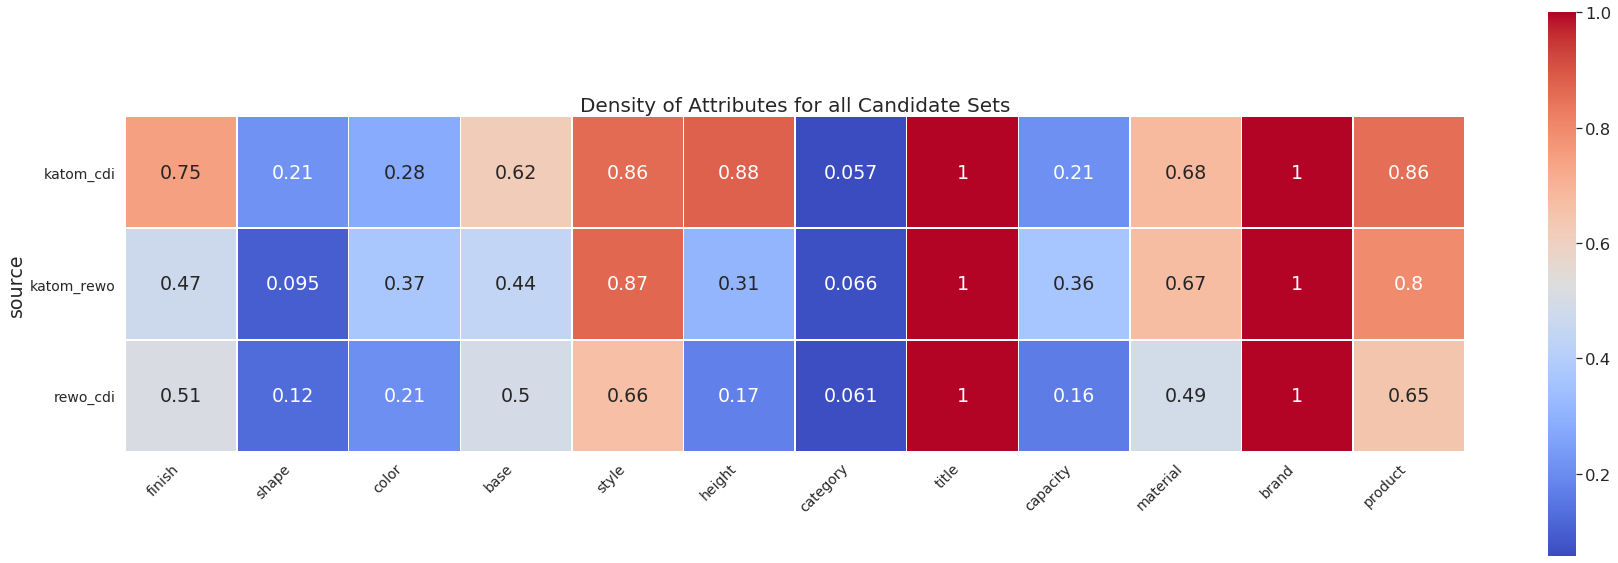

In [10]:
dex.plotDensityAttributesHeatmap(candsets)

In [11]:
# dense features for all combinations

# features excluded where the attribute has a very low density (<3%) for at 
# least one dataset that is involved either as source or target in the TL setting
rc_cdi_katom_rewo = ['finish_lev_sim', 'finish_jac_q3_sim',
       'finish_jac_an_sim', 'finish_rel_jac_an_sim', 'finish_containment_sim',
       'finish_exact_sim', 'color_lev_sim', 'color_jac_q3_sim',
       'color_jac_an_sim', 'color_rel_jac_an_sim', 'color_containment_sim',
       'color_exact_sim', 'base_lev_sim', 'base_jac_q3_sim', 'base_jac_an_sim',
       'base_rel_jac_an_sim', 'base_containment_sim', 'base_exact_sim',
       'style_cosine_tfidf_sim', 'style_lev_sim', 'style_jac_q3_sim',
       'style_jac_an_sim', 'style_rel_jac_an_sim', 'style_containment_sim',
       'style_exact_sim', 'height_lev_sim', 'height_jac_q3_sim',
       'height_jac_an_sim', 'height_rel_jac_an_sim', 'height_containment_sim',
       'height_exact_sim', 'title_cosine_tfidf_sim', 'title_lev_sim', 'title_jac_q3_sim',
       'title_jac_an_sim', 'title_rel_jac_an_sim', 'title_containment_sim',
       'title_exact_sim', 'capacity_lev_sim', 'capacity_jac_q3_sim',
       'capacity_jac_an_sim', 'capacity_rel_jac_an_sim',
       'capacity_containment_sim', 'capacity_exact_sim', 'material_lev_sim',
       'material_jac_q3_sim', 'material_jac_an_sim', 'material_rel_jac_an_sim',
       'material_containment_sim', 'material_exact_sim', 'brand_lev_sim',
       'brand_jac_q3_sim', 'brand_jac_an_sim', 'brand_rel_jac_an_sim',
       'brand_containment_sim', 'brand_exact_sim', 'product_type_lev_sim',
       'product_type_jac_q3_sim', 'product_type_jac_an_sim',
       'product_type_rel_jac_an_sim', 'product_type_containment_sim',
       'product_type_exact_sim']

# assign the different feature sets (different dense features depending on combination)
dense_features_dict = {'cdi_katom_rewo':rc_cdi_katom_rewo}

In [12]:
# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../results/benchmarks/'
supervised_results = 'kitchen_candsets_super_results'
unsupervised_results = 'kitchen_candsets_unsuper_results'

# we use the same random_state for all experiments
random_state = 42
# assign which sklearn estimators to use for the TL Experiment
#estimators_tl = {'logreg':LogisticRegression(random_state=random_state,solver='liblinear',max_iter=1000),
#                 'dectree':DecisionTreeClassifier(random_state=random_state),
#                 'randforest':RandomForestClassifier(random_state=random_state,n_estimators=10),
#                 'xgb':xgb.XGBClassifier(random_state=random_state,objective="binary:logistic"),
#                 'svm':LinearSVC(random_state=random_state,dual=False),
#                 #'svm':SVC(random_state=random_state,kernel='linear'),
#                 'logregcv':LogisticRegressionCV(random_state=random_state,cv=5,solver='liblinear',max_iter=1000)}

#### Import Passive Learning Baseline Results

In [13]:
candsets_super_results = sup.importJSONFileInDict(path_to_directory+supervised_results)

#### Import Unsupervised Learning Results

In [14]:
candsets_unsuper_results = sup.importJSONFileInDict(path_to_directory+unsupervised_results)

### AL_RF Unsupervised Bootstrap Baseline for ATLX

##### For all combinations

In [50]:
# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
feature = all_feature
query_strategies = ['lr_lsvc_rf_dt','lr_lsvc_rf_dt_xgb','random']
estimators = ['rf']
warm_start = True
quota = 100
disagreement = 'vote'
n = 5
# ***********************************************

al_results_unsup = al_unsup.al_unsup_boot_all(candsets,candsets_train,candsets_test,feature,
                                              estimators,query_strategies,quota,warm_start,
                                              reweight='score_based',disagreement='vote',n=5)

Start with AL using different settings for katom_cdi
Start with Estimator: rf
Start with Query Strategy: lr_lsvc_rf_dt
Starting AL Experiments with Unsupervised Bootstrapping for target katom_cdi
1. Run of 5
Initialize Dataset Object
Elbow_Threshold: 0.4508952509232009 and Index: 162
Initialize Learning Model
Initialize Query Strategy
Labeled weight: 1
Warm start: True
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Last iteration Performance on Target Test Set: F1 0.83; Prec 0.76; Recall 0.91
Average depth of trees at start (iteration 0): 8.9 at last iteration 6.144230769230769
Initial weights of queried pairs: Counter({0.6: 21, 0.3: 15, 0.4: 12, 0.7: 12, 0.1: 12, 0.5: 11, 0.2: 7, 0.0: 6, 0.8: 3, 0.9: 1})
Runtime: 25.68 seconds
Correctness of unsupervised Pool:  0.599
2. Run of 5
Initialize Dataset Object
Elbow_Threshold: 0.4508952509232009 and Index: 162
Initialize Learning Model
Initialize Query Strategy
Labeled weight: 1
Warm start: True
Progress: |██

Initialize Learning Model
Initialize Query Strategy
Labeled weight: 1
Warm start: True
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Last iteration Performance on Target Test Set: F1 0.70; Prec 0.65; Recall 0.76
Average depth of trees at start (iteration 0): 10.3 at last iteration 6.1298076923076925
Initial weights of queried pairs: Counter({0.2: 21, 0.3: 19, 0.4: 14, 0.1: 14, 0.5: 11, 0.7: 7, 0.6: 7, 0.0: 5, 0.8: 2})
Runtime: 36.33 seconds
Correctness of unsupervised Pool:  0.512
5. Run of 5
Initialize Dataset Object
Elbow_Threshold: 0.2476202385701289 and Index: 177
Initialize Learning Model
Initialize Query Strategy
Labeled weight: 1
Warm start: True
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Last iteration Performance on Target Test Set: F1 0.63; Prec 0.73; Recall 0.55
Average depth of trees at start (iteration 0): 10.4 at last iteration 6.096153846153846
Initial weights of queried pairs: Counter({0.2: 23, 0.3: 21

Initialize Learning Model
Initialize Query Strategy
Labeled weight: 1
Warm start: True
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Last iteration Performance on Target Test Set: F1 0.56; Prec 0.64; Recall 0.51
Average depth of trees at start (iteration 0): 12.7 at last iteration 5.8125
Initial weights of queried pairs: Counter({0.1: 18, 0.4: 17, 0.5: 14, 0.3: 14, 0.6: 13, 0.2: 13, 0.0: 7, 0.7: 4})
Runtime: 12.05 seconds
Correctness of unsupervised Pool:  0.534
3. Run of 5
Initialize Dataset Object
Elbow_Threshold: 0.6456823616199739 and Index: 3910
Initialize Learning Model
Initialize Query Strategy
Labeled weight: 1
Warm start: True
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Last iteration Performance on Target Test Set: F1 0.63; Prec 0.66; Recall 0.61
Average depth of trees at start (iteration 0): 12.7 at last iteration 6.076923076923077
Initial weights of queried pairs: Counter({0.5: 25, 0.1: 17, 0.2: 13, 0.3: 13

In [56]:
#sup.saveResultsToJSON(al_results_unsup,'../../results/benchmarks/kitchen_al_unsup_results')

Saved in ../../results/benchmarks/home_al_unsup_results.json


### ATLX results

In [ ]:
# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
query_strategies = ['lr_lsvc_rf_dt_xgb','random']
warm_start = True
weighting = [None,'nn','lrcv_predict_proba']
quota = 100
disagreement = 'vote'
n = 5
bootstrap_clf = 'rf'
n_bootstrapped_samples = 2
# ***********************************************
atlx_2 = atlx.atlx_all(candsets,candsets_train,candsets_test,dense_features_dict,
                             bootstrap_clf,query_strategies,quota,warm_start,
                             n_bootstrapped_samples,weighting,disagreement,
                             n,switch_roles=True)

In [ ]:
#sup.saveResultsToJSON(atlx_2,'../../results/atlx/kitchen_atlx_2')

#### Different Bootstrap Sample Size

In [30]:
# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
query_strategies = ['lr_lsvc_rf_dt_xgb','random']
warm_start = True
weighting = [None,'nn','lrcv_predict_proba']
quota = 100
disagreement = 'vote'
n = 5
bootstrap_clf = 'rf'
n_bootstrapped_samples = 10
# ***********************************************
atlx_10 = atlx.atlx_all(candsets,candsets_train,candsets_test,dense_features_dict,
                             bootstrap_clf,query_strategies,quota,warm_start,
                             n_bootstrapped_samples,weighting,disagreement,
                             n,switch_roles=True)

Start with ATL using different settings for source katom_cdi and target rewo_cdi
Start with Estimator: rf
Start with Query Strategy: lr_lsvc_rf_dt_xgb
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source katom_cdi and target rewo_cdi
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.70; Prec 0.68; Recall 0.72
Average depth of trees at start (iteration 0): 19.2 at last iteration 7.716346153846154
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 54.89 seconds
Corrected labels from transfer: 50
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10


Last iteration Performance on Target Test Set: F1 0.68; Prec 0.65; Recall 0.71
Average depth of trees at start (iteration 0): 19.2 at last iteration 7.927884615384615
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 12.42 seconds
Corrected labels from transfer: 42
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.69; Prec 0.59; Recall 0.82
Average depth of trees at start (iteration 0): 19.2 at last iteration 8.048076923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 12.59 seconds
Corrected labels from transfer: 33
3. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initia

n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.86; Prec 0.86; Recall 0.86
Average depth of trees at start (iteration 0): 29.5 at last iteration 7.908653846153846
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 44.72 seconds
Corrected labels from transfer: 43
2. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.84; Prec 0.86; Recall 0.83
Average depth of trees at start (iteration 0): 29.5 at last iteration 8.057692307692308
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 44.23 seconds
Corrected labels from transfer: 44
3. Run of 5
Initialize Dataset Object
Initia

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Last iteration Performance on Target Test Set: F1 0.86; Prec 0.81; Recall 0.92
Average depth of trees at start (iteration 0): 24.5 at last iteration 7.105769230769231
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 44.39 seconds
Corrected labels from transfer: 53
Start with Query Strategy: random
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source katom_rewo and target katom_cdi
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
n_labeled max, as specified upfront is 10
The actual amount of instances with a predict proba higher than 90% is 10
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.88; Prec 0.89; Recall 0.87
Average depth of trees at start (iteration 0): 26.5 at last iteration 6.850961538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 7.91 seconds
Corrected labels from trans

Last iteration Performance on Target Test Set: F1 0.82; Prec 0.87; Recall 0.78
Average depth of trees at start (iteration 0): 24.5 at last iteration 6.3173076923076925
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 8.24 seconds
Corrected labels from transfer: 44
Start with ATL using different settings for source rewo_cdi and target katom_rewo
Start with Estimator: rf
Start with Query Strategy: lr_lsvc_rf_dt_xgb
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source rewo_cdi and target katom_rewo
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.63; Prec 0.62; Recall 0.65
Average depth of trees at start (iteration 0): 29.5 at last iteration 7.091346153846154
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 55.52 seconds
Corrected labels from tra

Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.65; Prec 0.58; Recall 0.73
Average depth of trees at start (iteration 0): 29.5 at last iteration 6.850961538461538
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 14.74 seconds
Corrected labels from transfer: 49
5. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initialize Query Strategy
Last iteration Performance on Target Test Set: F1 0.64; Prec 0.58; Recall 0.72
Average depth of trees at start (iteration 0): 29.5 at last iteration 6.360576923076923
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 14.05 seconds
Corrected labels from transfer: 59
Start with Weighting Strategy: nn
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using nn
Starting ATL Experiments (WITH transfer!) source rewo_cdi and target katom_rewo
1. Run of 5
Initialize Dataset Object
Initialize Learning Model
Initiali

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
#sup.saveResultsToJSON(atlx_10,'../../results/atlx/kitchen_atlx_10_v2')

Saved in ../../results/atlx/kitchen_atlx_10_v2.json


## Import AL Unsup Boot (Baseline) and ATL RF Results

In [15]:
al_results_unsup = sup.importJSONFileInDict('../../results/benchmarks/kitchen_al_unsup_results')

In [16]:
atlx_results_2 = sup.importJSONFileInDict('../../results/atlx/kitchen_atlx_2')

In [17]:
atlx_results_10 = sup.importJSONFileInDict('../../results/atlx/kitchen_atlx_10')

### Whole Table to see results per weighting for all combinations

**Otherwise impossible to get a general overview when only looking at each single plot**

In [18]:
selected_weighting = 'no_weighting'
selected_qs = None
max_quota = 100
df_no_weighting = dut.createDFwithAlUnsupandATLXResultsMoreItersUpToMaxQuota(atlx_results_2,al_results_unsup,
                                                             selected_weighting,candsets_super_results,
                                                             selected_qs,max_quota=100,
                                                             filename='../../results/atlx/kitchen_2_ws_nw')

Weighting: no_weighting and Query Strategy: None


In [20]:
selected_weighting = 'nn'
selected_qs = None
max_quota = 100
df_nn = dut.createDFwithAlUnsupandATLXResultsMoreItersUpToMaxQuota(atlx_results_2,al_results_unsup,
                                                             selected_weighting,candsets_super_results,
                                                             selected_qs,max_quota=100,
                                                            filename='../../results/atlx/kitchen_2_ws_nn')

Weighting: nn and Query Strategy: None


In [24]:
selected_weighting = 'lrcv_predict_proba'
selected_qs = None
max_quota = 100
df_lprob = dut.createDFwithAlUnsupandATLXResultsMoreItersUpToMaxQuota(atlx_results_2,al_results_unsup,
                                                             selected_weighting,candsets_super_results,
                                                             selected_qs,max_quota=100,
                                                            filename='../../results/atlx/kitchen_2_ws_lp')

Weighting: lrcv_predict_proba and Query Strategy: None


In [27]:
selected_qs = 'lr_lsvc_rf_dt_xgb'
max_quota = 100

df_no_weighting_nn_lprob_compared = dut.createDFwithAlUnsupandATLXResultsToCompareDA(atlx_results_2,
                                                                                     al_results_unsup,
                                                                                     candsets_super_results,
                                                                                     selected_qs,max_quota,
                                                                                     filename='../../results/atlx/kitchen_2_ws_nw_nn_lp')

All ATLX results with no_weighting and nn as well as lr_predict_proba (lp) and Query Strategy: lr_lsvc_rf_dt_xgb


In [29]:
df_model_change = dut.createDFModelChange(atlx_results_2,al_results_unsup,candsets_super_results,dense_features_dict,selected_qs=['lr_lsvc_rf_dt_xgb'],clf='rf',display_feature_importance=False,filename=None)

In [30]:
df_kpis = df_model_change.drop(columns=['f1_in_0','f1_in_-1','adt_0','adt_-1','c_0','c_-1','ordered_attr_import_0','ordered_attr_import_-1','top_5_feature_0','top_5_feature_-1'])

In [33]:
df_kpis.index = pd.MultiIndex.from_tuples([( 'katom_cdi',   'rewo_cdi',  '-'),
            ( 'katom_cdi',   'rewo_cdi', 'nn'),
            ( 'katom_cdi',   'rewo_cdi', 'lp'),
            (  'rewo_cdi',  'katom_cdi',  '-'),
            (  'rewo_cdi',  'katom_cdi', 'nn'),
            (  'rewo_cdi',  'katom_cdi', 'lp'),
            ( 'katom_cdi', 'katom_rewo',  '-'),
            ( 'katom_cdi', 'katom_rewo', 'nn'),
            ( 'katom_cdi', 'katom_rewo', 'lp'),
            ('katom_rewo',  'katom_cdi',  '-'),
            ('katom_rewo',  'katom_cdi', 'nn'),
            ('katom_rewo',  'katom_cdi', 'lp'),
            (  'rewo_cdi', 'katom_rewo',  '-'),
            (  'rewo_cdi', 'katom_rewo', 'nn'),
            (  'rewo_cdi', 'katom_rewo', 'lp'),
            ('katom_rewo',   'rewo_cdi',  '-'),
            ('katom_rewo',   'rewo_cdi', 'nn'),
            ('katom_rewo',   'rewo_cdi', 'lp')],
           names=['Source', 'Target', 'DA'])

In [34]:
dut.styleDFModelChange(df_kpis,False,filename='../../results/atlx/kitchen_2_kpis')

In [46]:
df_model_change = df_model_change[['ls','adt_0','adt_-1','c_0','c_-1','ordered_attr_import_0','ordered_attr_import_-1']].copy()

In [47]:
df_model_change.index = pd.MultiIndex.from_tuples([( 'katom_cdi',   'rewo_cdi',  '-'),
            ( 'katom_cdi',   'rewo_cdi', 'nn'),
            ( 'katom_cdi',   'rewo_cdi', 'lp'),
            (  'rewo_cdi',  'katom_cdi',  '-'),
            (  'rewo_cdi',  'katom_cdi', 'nn'),
            (  'rewo_cdi',  'katom_cdi', 'lp'),
            ( 'katom_cdi', 'katom_rewo',  '-'),
            ( 'katom_cdi', 'katom_rewo', 'nn'),
            ( 'katom_cdi', 'katom_rewo', 'lp'),
            ('katom_rewo',  'katom_cdi',  '-'),
            ('katom_rewo',  'katom_cdi', 'nn'),
            ('katom_rewo',  'katom_cdi', 'lp'),
            (  'rewo_cdi', 'katom_rewo',  '-'),
            (  'rewo_cdi', 'katom_rewo', 'nn'),
            (  'rewo_cdi', 'katom_rewo', 'lp'),
            ('katom_rewo',   'rewo_cdi',  '-'),
            ('katom_rewo',   'rewo_cdi', 'nn'),
            ('katom_rewo',   'rewo_cdi', 'lp')],
           names=['Source', 'Target', 'DA'])

In [48]:
dut.styleSimple(df_model_change,filename='../../results/atlx/kitchen_2_model_change')

In [37]:
#dut.styleSimple(df_model_change,filename='../../results/atlx/kitchen_2_modelchange')

## Plots

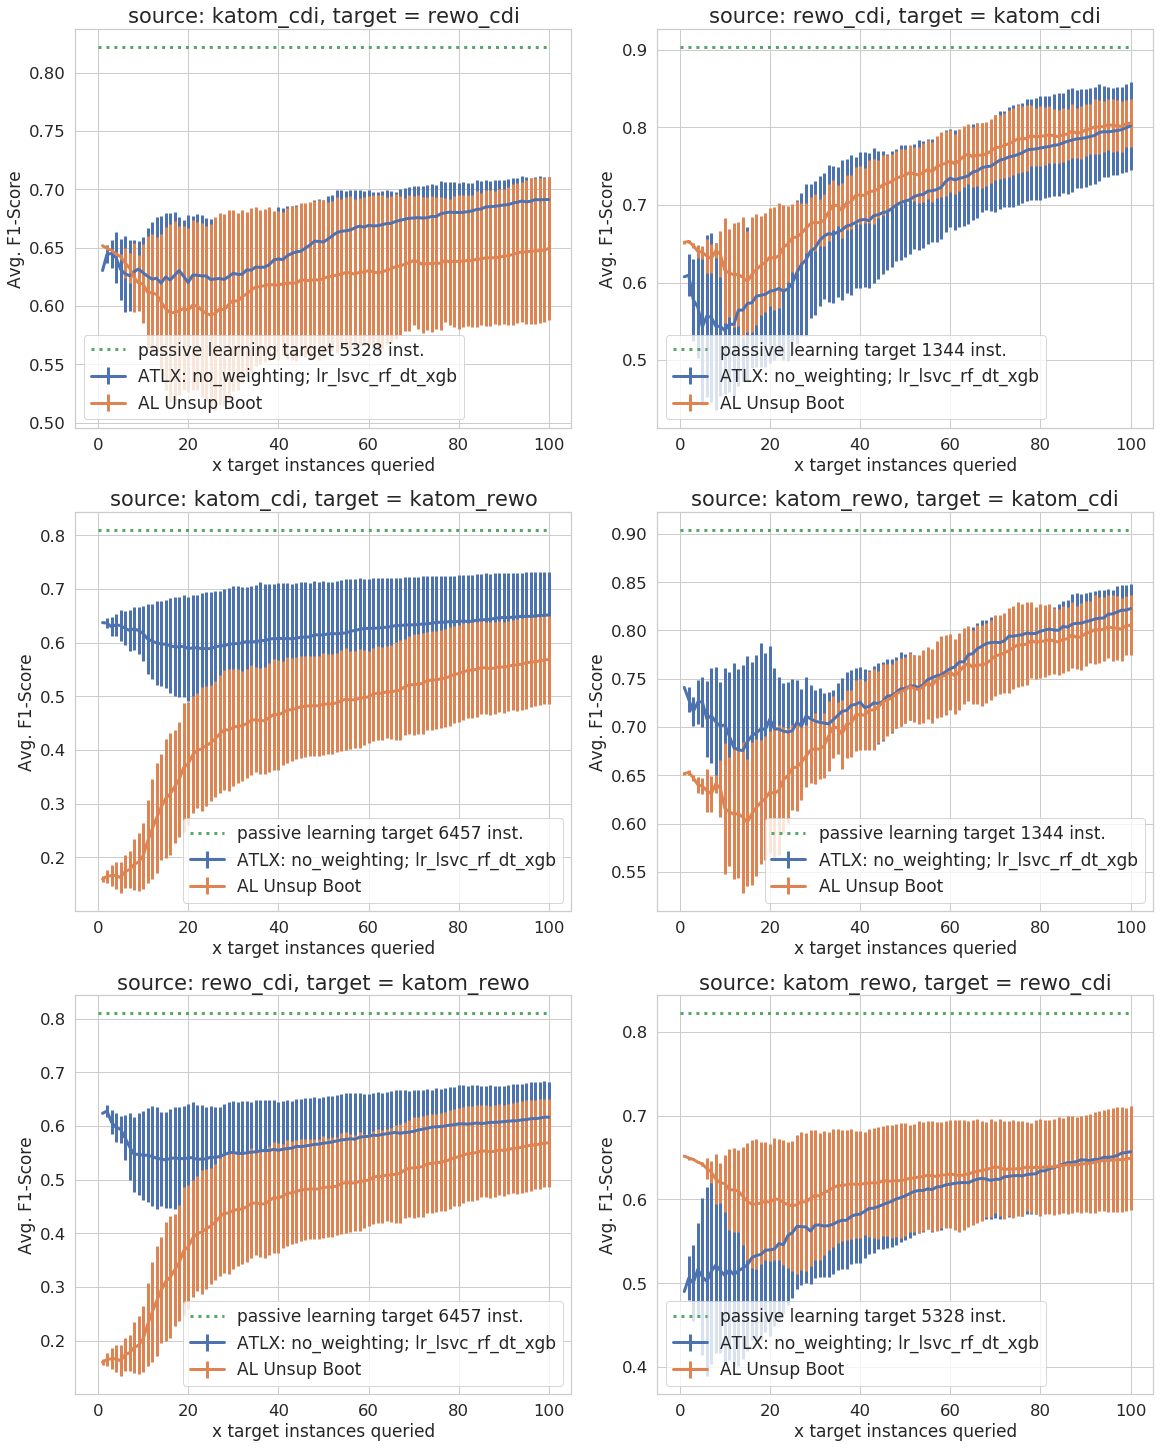

In [45]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = ['lr_lsvc_rf_dt_xgb']   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = al_results_unsup  # None means only ATL Results are plotted. If al_also = al_results then also al results
selected_weights = ['no_weighting'] #['nn']
quota = 100
n = 5
warm_start=True
# ***********************************************

dut.plotATLXALUnsupResultsAll(atlx_results_2,quota,candsets,candsets_super_results,n,warm_start,
                              selected_estimator,al_also,selected_qs,
                              selected_weights,errorbars=True,saveFig=True,
                              path_for_output='../../results/atlx/kitchen_atlx_eval_plot_v2')

#### Transfer from katom_rewo to katom_cdi

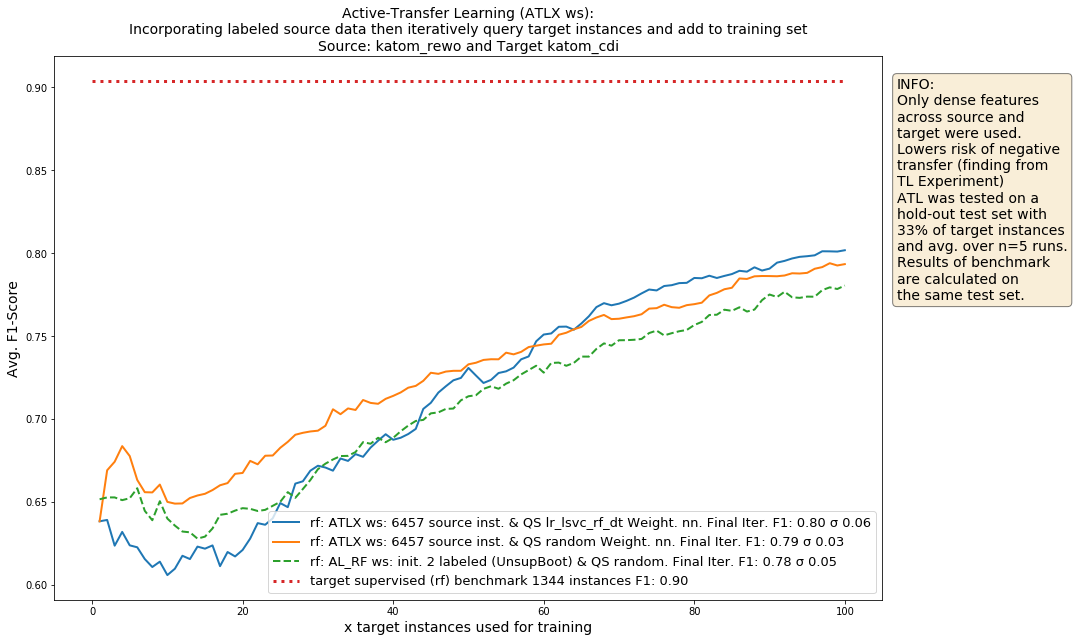

In [39]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'katom_rewo'
target_name = 'katom_cdi'
selected_estimator = ['rf']  
selected_qs = None   # None means all! ['lr_lsvc_rf_dt','random']
al_also = al_results_unsup  # None means only ATLX Results are plotted. If al_also = al_results then also al results
selected_weights = ['nn'] #['nn']
quota = 100
n = 5
warm_start=True
# ***********************************************

dut.plotATLXALUnsupResults(atlx_results,source_name,target_name,quota,candsets,candsets_super_results,
               n,warm_start,selected_estimator,al_also,selected_qs,selected_weights,errorbars=False,
                             ylim=None,saveFig=False,path_for_output='./graphics/custom_plots/')

#### Transfer from katom_cdi to katom_rewo

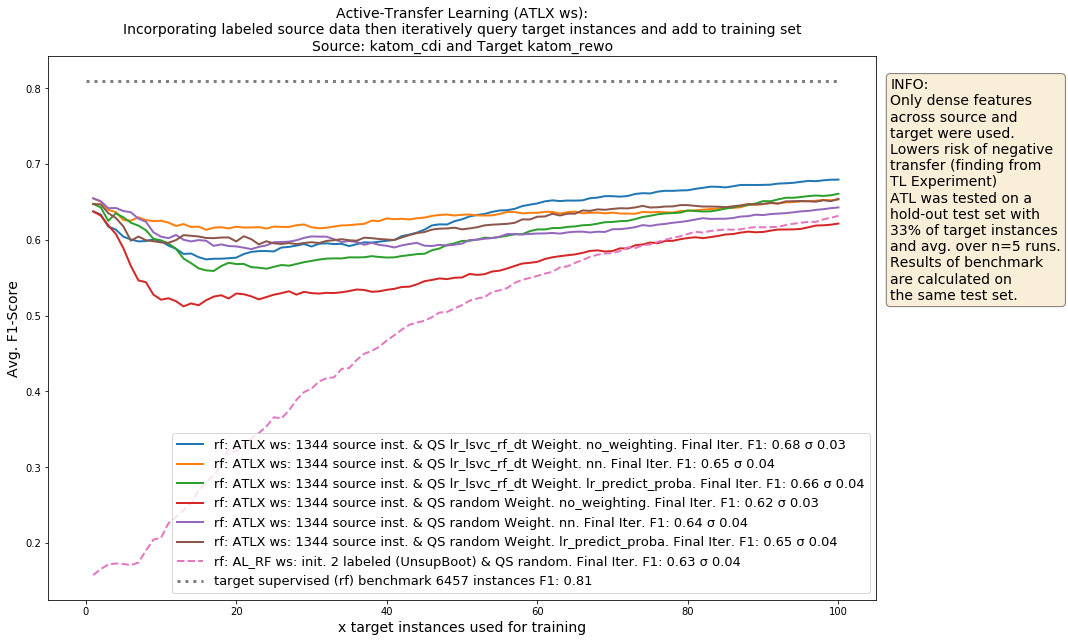

In [34]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'katom_cdi'
target_name = 'katom_rewo'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = None   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = al_results_unsup  # None means only ATL Results are plotted. If al_also = al_results then also al results
selected_weights = None #['nn']
quota = 100
n = 5
warm_start=True
# ***********************************************

dut.plotATLXALUnsupResults(atlx_results,source_name,target_name,quota,candsets,candsets_super_results,
               n,warm_start,selected_estimator,al_also,selected_qs,selected_weights,errorbars=False,
                             ylim=None,saveFig=False,path_for_output='./graphics/custom_plots/')

#### Transfer from katom_cdi to rewo_cdi

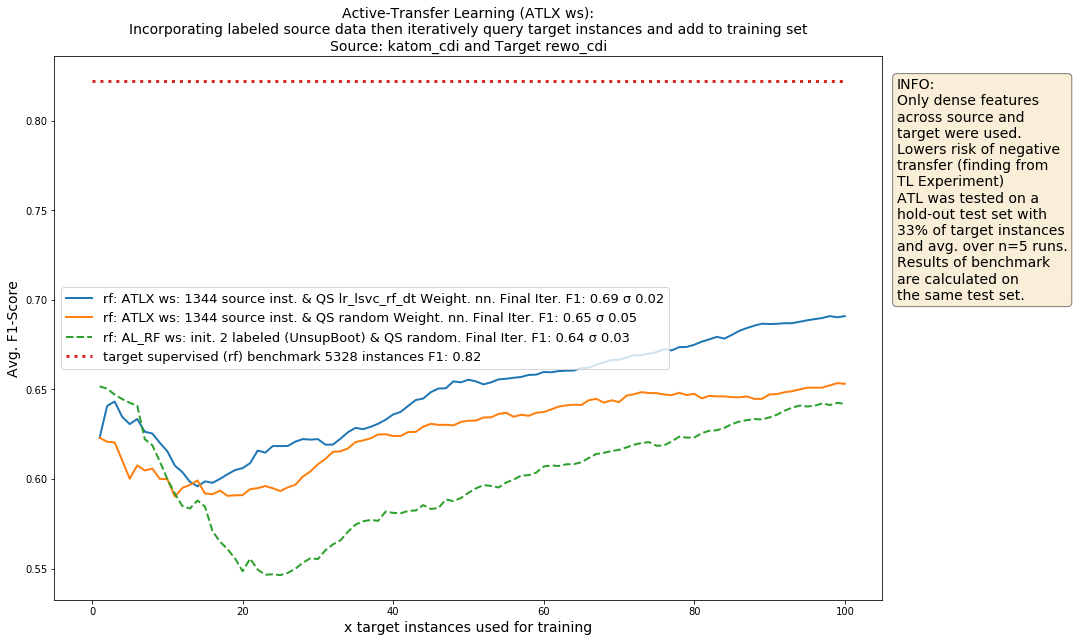

In [35]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'katom_cdi'
target_name = 'rewo_cdi'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = None   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = al_results_unsup  # None means only ATL Results are plotted. If al_also = al_results then also al results
selected_weights = ['nn']
quota = 100
n = 5
warm_start=True
# ***********************************************

dut.plotATLXALUnsupResults(atlx_results,source_name,target_name,quota,candsets,candsets_super_results,
               n,warm_start,selected_estimator,al_also,selected_qs,selected_weights,errorbars=False,
                             ylim=None,saveFig=False,path_for_output='./graphics/custom_plots/')

#### Transfer from rewo_cdi to katom_cdi

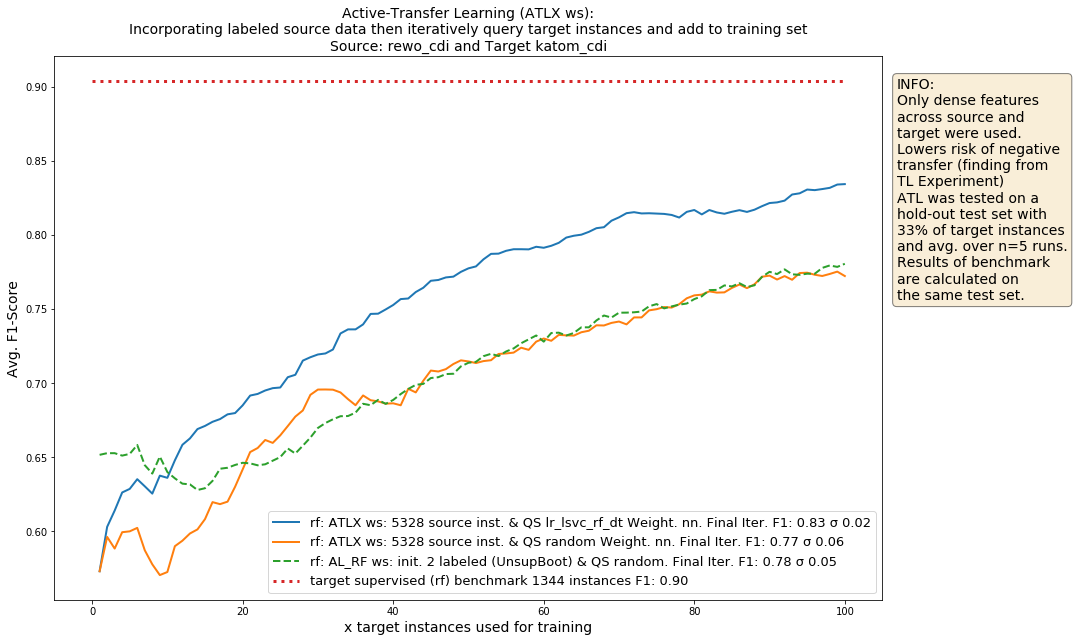

In [36]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'rewo_cdi'
target_name = 'katom_cdi'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = None   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = al_results_unsup  # None means only ATL Results are plotted. If al_also = al_results then also al results
selected_weights = ['nn']
quota = 100
n = 5
warm_start=True
# ***********************************************

dut.plotATLXALUnsupResults(atlx_results,source_name,target_name,quota,candsets,candsets_super_results,
               n,warm_start,selected_estimator,al_also,selected_qs,selected_weights,errorbars=False,
                             ylim=None,saveFig=False,path_for_output='./graphics/custom_plots/')

#### Transfer from rewo_cdi to katom_rewo

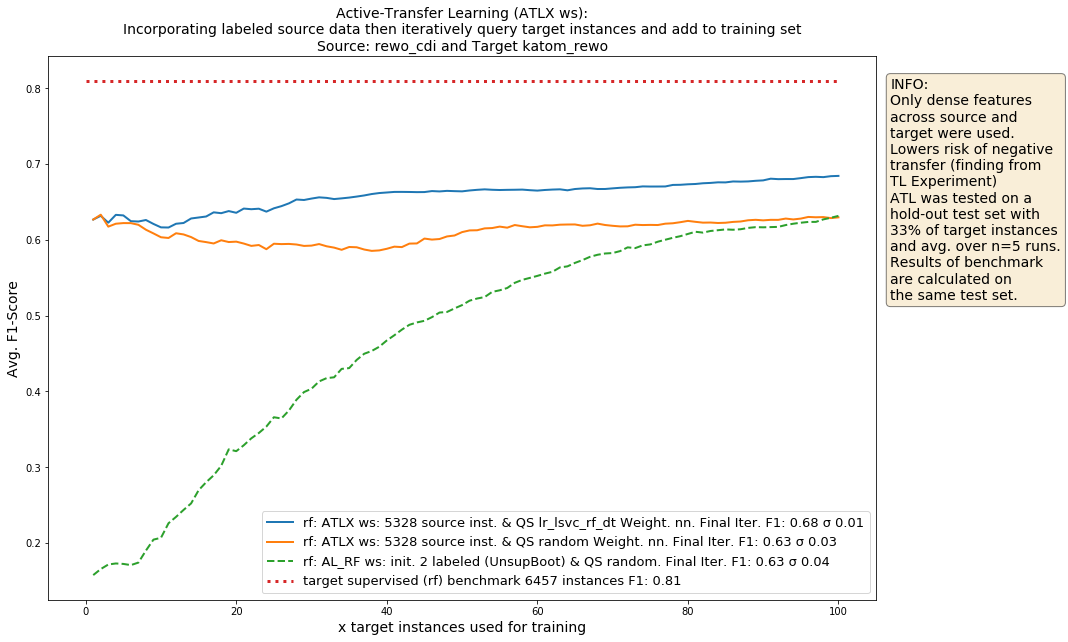

In [37]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'rewo_cdi'
target_name = 'katom_rewo'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = None   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = al_results_unsup  # None means only ATL Results are plotted. If al_also = al_results then also al results
selected_weights = ['nn']
quota = 100
n = 5
warm_start=True
# ***********************************************

dut.plotATLXALUnsupResults(atlx_results,source_name,target_name,quota,candsets,candsets_super_results,
               n,warm_start,selected_estimator,al_also,selected_qs,selected_weights,errorbars=False,
                             ylim=None,saveFig=False,path_for_output='./graphics/custom_plots/')

#### Transfer from katom_rewo to rewo_cdi

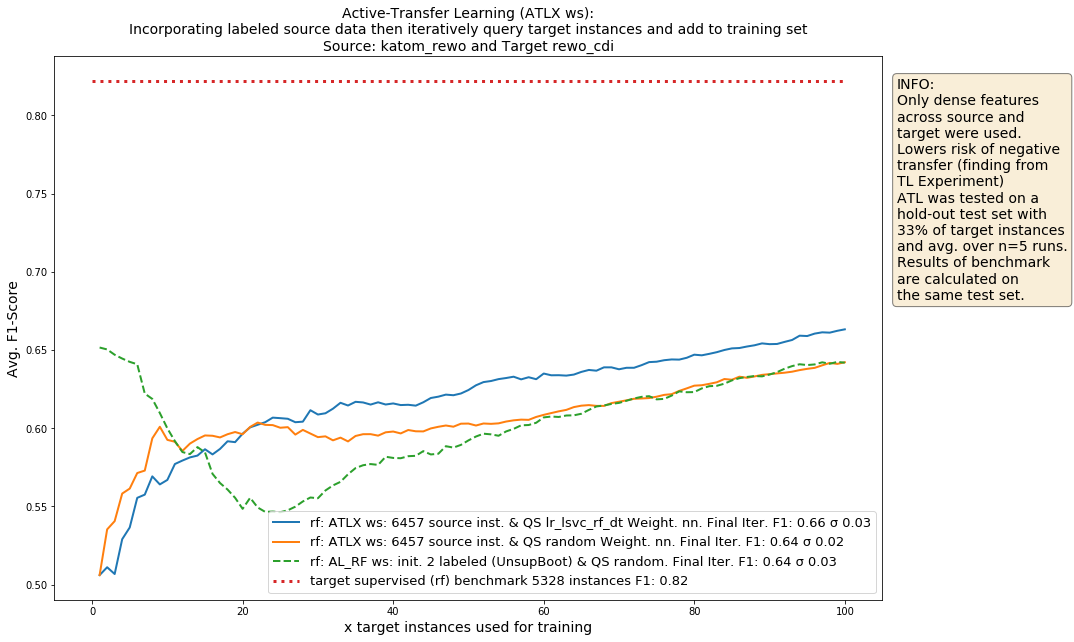

In [38]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'katom_rewo'
target_name = 'rewo_cdi'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = None   # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = al_results_unsup  # None means only ATL Results are plotted. If al_also = al_results then also al results
selected_weights = ['nn']
quota = 100
n = 5
warm_start=True
# ***********************************************

dut.plotATLXALUnsupResults(atlx_results,source_name,target_name,quota,candsets,candsets_super_results,
               n,warm_start,selected_estimator,al_also,selected_qs,selected_weights,errorbars=False,
                             ylim=None,saveFig=False,path_for_output='./graphics/custom_plots/')